In [1]:
pip install ultralytics

/home/ubuntu/micromamba/envs/deepl/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [2]:
import torch
from ultralytics import YOLO
from datasets import YOLODataset
from torch.utils.data import DataLoader

In [5]:
# Root directory of the dataset
class_names = ['fish', 'jellyfish', 'penguin', 'puffin', 'shark', 'starfish', 'stingray']
num_classes = len(class_names)
root_dir = 'aquarium-data-cots/aquarium_pretrain'

# Create datasets
train_dataset = YOLODataset(root_dir, split='train', num_classes=num_classes)
valid_dataset = YOLODataset(root_dir, split='valid', num_classes=num_classes)
test_dataset = YOLODataset(root_dir, split='test', num_classes=num_classes)

# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

print(f"Training samples: {len(train_dataset)}")
print(f"Validation samples: {len(valid_dataset)}")
print(f"Test samples: {len(test_dataset)}")

Model

Epoch 1/5, Training Loss: 0.4766
Validation Loss: 0.4221
Epoch 2/5, Training Loss: 0.4013
Validation Loss: 0.3727
Epoch 3/5, Training Loss: 0.3509
Validation Loss: 0.3381
Epoch 4/5, Training Loss: 0.3263
Validation Loss: 0.3304
Epoch 5/5, Training Loss: 0.3097
Validation Loss: 0.3156


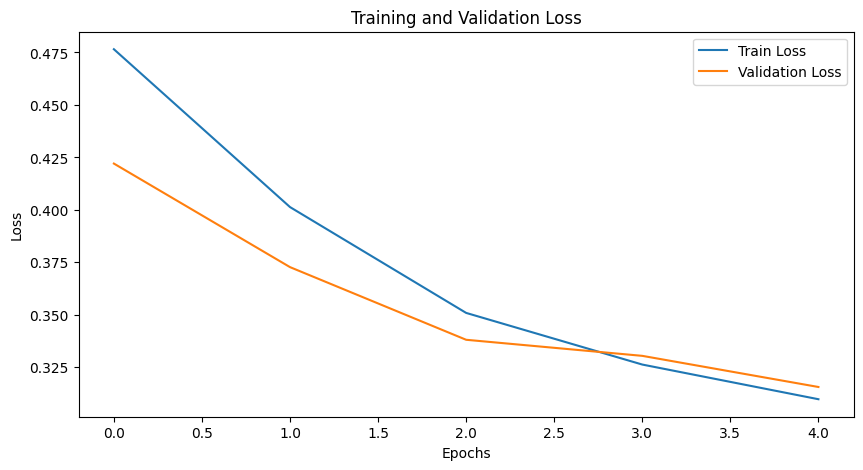

Class fish AP: 0.7492
Class jellyfish AP: 0.6534
Class penguin AP: 0.6797
Class puffin AP: 0.5806
Class shark AP: 0.6566
Class starfish AP: 0.5392
Class stingray AP: 0.5480
mAP: 0.6295


In [6]:
# Define the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = YOLO('yolov5su.pt')
model = model.to(device)

In [ ]:
num_epochs = 10

model.train(
    data='/aquarium-data-cots/aquarium_pretrain/data.yaml', 
    epochs=num_epochs, 
    imgsz=640,  
    save_period=1,  # Save model every epoch
    save_dir='runs/train',  # Directory to save training results
)

# Evaluate metrics on validation set after each epoch
for epoch in range(num_epochs):
    val_metrics = model.val()
    print(f"Epoch {epoch + 1}/{num_epochs}")
    print("Validation Loss:", val_metrics['loss'])
    print("Validation Accuracy:", val_metrics['metrics/accuracy'])

# Plot metrics like loss and mAP
model.plot()

# Save predictions to a directory
model.predict(valid_loader, conf=0.8, save=True, save_dir='runs/predict/valid')  # Set save=True to store predictions

# Test set

In [ ]:
model.predict(test_loader, conf=0.8, save=True, save_dir='runs/predict/test')